# 1. 어린이 교통사고 데이터 전처리

### 데이터 전처리 

1) 어린이사고 내에서 새로 열을 만들어서 어린이 보호구역 내 사고인지 표시하기 
    - 각 엑셀데이터를 불러와서 일자, 주소가 일치하는 등의 기준을 설정해서 중복데이터인지 확인 -> 어린이 보호구역 내 사고인지 새로운 열에 표시  
2) 어린이가 피해자가 아닌 행을 삭제(피해자연령 12세 이하만)  
3) 어린이보호구역열이 빈칸인 것은 보호구역이 아닌것으로 간주. 

In [6]:
import pandas as pd

# 데이터 불러오기
filepath1 = r'c:/Users/danddi/my_ws/project/mid_project/어린이 교통사고 자료/경기-어린이사고17-19.xlsx'
df1 = pd.read_excel(filepath1)
df1.head()


,사고번호,사고일시,요일,시군구,사고내용,사망자수,중상자수,경상자수,부상신고자수,사고유형,...,기상상태,도로형태,가해운전자 차종,가해운전자 성별,가해운전자 연령,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도
0,2017010100100164,2017년 1월 1일 11시,일요일,경기도 성남시 중원구 성남동,경상사고,0,0,3,0,차대차 - 추돌,...,맑음,교차로 - 교차로안,화물,남,49세,상해없음,승용,남,70세,경상
1,2017010100100222,2017년 1월 1일 14시,일요일,경기도 수원시 팔달구 고등동,경상사고,0,0,4,0,차대차 - 정면충돌,...,맑음,교차로 - 교차로안,승용,남,22세,상해없음,승용,남,35세,경상
2,2017010100100246,2017년 1월 1일 15시,일요일,경기도 파주시 당하동,부상신고사고,0,0,0,1,차대사람 - 횡단중,...,맑음,미분류 - 미분류,승용,남,42세,상해없음,보행자,남,2세,부상신고
3,2017010100100341,2017년 1월 1일 19시,일요일,경기도 안산시 단원구 와동,경상사고,0,0,2,0,차대차 - 정면충돌,...,흐림,교차로 - 교차로안,승용,남,32세,상해없음,승용,여,40세,경상
4,2017010200100213,2017년 1월 2일 12시,월요일,경기도 고양시 일산동구 풍동,경상사고,0,0,1,2,차대차 - 측면충돌,...,맑음,교차로 - 교차로안,승용,여,40세,상해없음,승용,여,41세,경상


In [7]:
df1.shape

(8504, 22)

In [8]:
# 데이터 불러오기
filepath2 = r'c:/Users/danddi/my_ws/project/mid_project/어린이 교통사고 자료/경기-어린이보호구역사고17-19.xlsx'
df2 = pd.read_excel(filepath2)
df2.head()

,사고번호,사고일시,요일,시군구,사고내용,사망자수,중상자수,경상자수,부상신고자수,사고유형,...,기상상태,도로형태,가해운전자 차종,가해운전자 성별,가해운전자 연령,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도
0,2017010600100510,2017년 1월 6일 20시,금요일,경기도 의왕시 내손동,경상사고,0,0,1,0,차대차 - 측면충돌,...,맑음,단일로 - 기타,자전거,남,14세,상해없음,이륜,남,17세,경상
1,2017010700100197,2017년 1월 7일 09시,토요일,경기도 안산시 단원구 원곡동,경상사고,0,0,1,0,차량단독 - 기타,...,맑음,단일로 - 기타,승합,남,42세,상해없음,NaN,NaN,NaN,NaN
2,2017011300100104,2017년 1월 13일 07시,금요일,경기도 용인시 수지구 죽전동,중상사고,0,1,0,0,차대사람 - 횡단중,...,흐림,교차로 - 교차로안,승용,남,52세,상해없음,보행자,여,48세,중상
3,2017011400100175,2017년 1월 14일 10시,토요일,경기도 부천시 소사본동,경상사고,0,0,1,0,차대사람 - 횡단중,...,맑음,교차로 - 교차로횡단보도내,승용,남,22세,상해없음,보행자,남,42세,경상
4,2017011700100589,2017년 1월 17일 23시,화요일,경기도 고양시 일산서구 주엽동,경상사고,0,0,1,0,차대사람 - 횡단중,...,맑음,교차로 - 교차로횡단보도내,승용,여,48세,상해없음,보행자,여,26세,경상


In [9]:
df2.shape

(721, 22)

In [10]:
# '어린이 보호구역'확인을 위해 중복행 찾기
df3 = pd.concat([df1,df2])
df3 = df3.reset_index(drop=True) # 인덱스 초기화

In [11]:
# '어린이 보호구역'확인을 위해 중복행 찾기
df3 = pd.concat([df1,df2])
df3 = df3.reset_index(drop=True) 

# '어린이 보호구역'열 생성
df3['어린이보호구역'] = 0

# 중복값으로 사용할 '사고번호'열의 값들 리스트에 담기
dupli_list = df3[df3.duplicated()]['사고번호'].tolist()

# 사고번호에 해당하는 index를 리스트 만들기
yes_list=df3[df3['사고번호'].isin(dupli_list)].index.tolist()

# 해당하는 인덱스, '어린이보호구역'열 값을 1로 변경
df3.loc[yes_list,'어린이보호구역']=1

In [12]:
# '어린이 보호구역'열 값 제대로 들어갔는지 확인
df3[df3['사고번호']==2017012400100380] 

# 중복처리를 위해 합친 데이터 다시 떼어내기
df4 = df3.loc[0:8503,:]

# 데이터 확인
df4.head()

# 결측치 확인
df4.isnull().sum()

# 결측치 있는 행 삭제
df4.dropna(subset=['피해운전자 차종'], axis=0, inplace=True)

C:\Users\danddi\AppData\Local\Temp\ipykernel_14644\135717525.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4.dropna(subset=['피해운전자 차종'], axis=0, inplace=True)


In [ ]:
## 어린이 피해자인 경우만 고르기 위해 '피해운전자 연령'열값 전처리

# 피해자 연령 고유값 확인
df4['피해운전자 연령'].unique()

# '미분류'인 값 어떤 정보인지 확인.
df4[df4['피해운전자 연령']=='미분류']

# '미분류' 행 삭제
drop_list = df4[df4['피해운전자 연령']=='미분류'].index.tolist()
df4.drop(index=drop_list,inplace=True)

# 피해자 연령 숫자값으로 변경
df4['피해운전자 연령'] = df4['피해운전자 연령'].str.replace('세 이상','')
df4['피해운전자 연령'] = df4['피해운전자 연령'].str.replace('세','')
df4['피해운전자 연령'] = df4['피해운전자 연령'].astype(int)

# 어린이 피해자만 새로운 데이터프레임에 지정
df5 = df4[df4['피해운전자 연령'] <= 12 ]

# 내보내기
df5.to_excel(r'c:/users/danddi/my_ws/project/mid_project/경기_1719.xlsx')

In [14]:
# 경기지역 어린이보호구역내/외 발생인지 표기한 파일 불러와서 합치기
df1 = pd.read_excel(r'c:/Users/danddi/my_ws/project/mid_project/어린이 교통사고 자료/경기_1719.xlsx')
df2 = pd.read_excel(r'c:/Users/danddi/my_ws/project/mid_project/어린이 교통사고 자료/경기_2022.xlsx')
df3 = pd.concat([df1,df2])
df3 = df3.reset_index(drop=True)
df3.drop(['Unnamed: 0'],axis=1,inplace=True)
df3.to_excel(r'c:/users/danddi/my_ws/project/mid_project/어린이 교통사고 자료/어린이교통사고전처리완료/경기어린이보호구역표시.xlsx')

In [15]:
# 데이터 불러와서 합치기
d1=pd.read_csv(r'c:/users/danddi/my_ws/project/mid_project/어린이 교통사고 자료/어린이교통사고전처리완료/서울어린이보호구역표시.csv',index_col=False)
d2=pd.read_excel(r'c:/users/danddi/my_ws/project/mid_project/어린이 교통사고 자료/어린이교통사고전처리완료/경기어린이보호구역표시.xlsx',index_col=False)
d3 = pd.concat([d1,d2])
d3 = d3.reset_index(drop=True) 
d3.drop(['Unnamed: 0'],axis=1,inplace=True)

# '사고일시'열로 '연도','월','일','시간'열 생성
date= d3.사고일시.str.split(' ')
d3['연도']=date.str.get(0)
d3['월']=date.str.get(1)
d3['일']=date.str.get(2)
d3['시간']=date.str.get(3)
d3['연도']=d3['연도'].str.replace('년','')
d3['월']=d3['월'].str.replace('월','')
d3['일']=d3['일'].str.replace('일','')
d3['시간']=d3['시간'].str.replace('시','')

# 필요없는열, 중복열 삭제
d3.drop(['사고내용', '사망자수', '중상자수', '경상자수', '부상신고자수'],axis=1,inplace=True)
d3.isnull().sum()

# '시군구'열로 '도/시','시/구'열 생성
addr=d3.시군구.str.split(' ')
d3['도/시']=addr.str.get(0)
d3['시/구']=addr.str.get(1)

# '가해운전자 연령'열 numeric값으로 변환
d3['가해운전자 연령'].unique()
d3['가해운전자 연령']=d3['가해운전자 연령'].str.replace('세 이상','')
d3['가해운전자 연령']=d3['가해운전자 연령'].str.replace('세','')
d3['가해운전자 연령']=d3['가해운전자 연령'].replace('미분류','0')
d3['가해운전자 연령']=d3['가해운전자 연령'].astype(int)
d3['가해운전자 연령'].unique()

# 결측값 확인
d3.isnull().sum()

# 전처리완료 데이터 excel파일로 저장
d3.to_excel(r'c:/Users/danddi/my_ws/project/mid_project/어린이 교통사고 자료/어린이교통사고전처리완료/all.xlsx')
d3[:3161].to_excel(r'c:/Users/danddi/my_ws/project/mid_project/어린이 교통사고 자료/어린이교통사고전처리완료/seoul.xlsx')
d3[3161:].to_excel(r'c:/Users/danddi/my_ws/project/mid_project/어린이 교통사고 자료/어린이교통사고전처리완료/gyeonggi.xlsx')

---

# 2. 어린이 교통사고 데이터 EDA 시각화

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus']=False
fontdict={'fontsize':'13','fontweight':'bold'}

In [3]:
df1 = pd.read_excel(r'c:/Users/danddi/my_ws/project/mid_project/어린이 교통사고 자료/어린이교통사고전처리완료/all.xlsx',index_col='Unnamed: 0')
df1.head()

,사고번호,사고일시,요일,시군구,사고유형,법규위반,노면상태,기상상태,도로형태,가해운전자 차종,...,피해운전자 성별,피해운전자 연령,피해운전자 상해정도,어린이보호구역,연도,월,일,시간,도/시,시/구
0,2017010200100403,2017년 1월 2일 19시,월요일,서울특별시 중랑구 면목동,차대사람 - 횡단중,안전운전불이행,건조,맑음,단일로 - 기타,승합,...,남,12,경상,0,2017,1,2,19,서울특별시,중랑구
1,2017010300100250,2017년 1월 3일 12시,화요일,서울특별시 노원구 하계동,차대차 - 측면충돌,안전운전불이행,건조,맑음,단일로 - 기타,기타불명,...,남,8,부상신고,0,2017,1,3,12,서울특별시,노원구
2,2017010400100297,2017년 1월 4일 15시,수요일,서울특별시 송파구 문정동,차대차 - 측면충돌,안전운전불이행,건조,맑음,단일로 - 기타,승용,...,남,12,중상,0,2017,1,4,15,서울특별시,송파구
3,2017010400100442,2017년 1월 4일 19시,수요일,서울특별시 관악구 신림동,차대사람 - 횡단중,안전운전불이행,건조,맑음,교차로 - 교차로부근,승용,...,남,8,경상,0,2017,1,4,19,서울특별시,관악구
4,2017010500100479,2017년 1월 5일 21시,목요일,서울특별시 성북구 장위동,차대사람 - 기타,안전운전불이행,건조,맑음,단일로 - 기타,화물,...,남,4,경상,0,2017,1,5,21,서울특별시,성북구


In [ ]:
df1.shape

(8965, 24)

In [ ]:
df1['피해운전자 연령'].unique()

df1.info()

df1.isnull().sum()

df1.columns

<class 'pandas.core.frame.DataFrame'>
Index: 8965 entries, 0 to 8964
Data columns (total 24 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   사고번호        8965 non-null   int64 
 1   사고일시        8965 non-null   object
 2   요일          8965 non-null   object
 3   시군구         8965 non-null   object
 4   사고유형        8965 non-null   object
 5   법규위반        8965 non-null   object
 6   노면상태        8965 non-null   object
 7   기상상태        8965 non-null   object
 8   도로형태        8965 non-null   object
 9   가해운전자 차종    8965 non-null   object
 10  가해운전자 성별    8965 non-null   object
 11  가해운전자 연령    8965 non-null   int64 
 12  가해운전자 상해정도  8965 non-null   object
 13  피해운전자 차종    8965 non-null   object
 14  피해운전자 성별    8965 non-null   object
 15  피해운전자 연령    8965 non-null   int64 
 16  피해운전자 상해정도  8965 non-null   object
 17  어린이보호구역     8965 non-null   int64 
 18  연도          8965 non-null   int64 
 19  월           8965 non-null   int64 
 20  일           8

Index(['사고번호', '사고일시', '요일', '시군구', '사고유형', '법규위반', '노면상태', '기상상태', '도로형태',
       '가해운전자 차종', '가해운전자 성별', '가해운전자 연령', '가해운전자 상해정도', '피해운전자 차종',
       '피해운전자 성별', '피해운전자 연령', '피해운전자 상해정도', '어린이보호구역', '연도', '월', '일', '시간',
       '도/시', '시/구'],
      dtype='object')

---

## 보호구역 내/외 사고비율

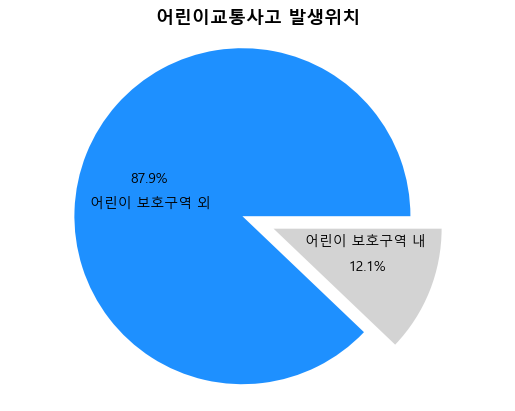

In [ ]:
df1.어린이보호구역.value_counts().plot.pie(autopct='%.1f%%',pctdistance=0.6,explode=[0.2,0],colors=['dodgerblue','lightgray'], labels=['어린이 보호구역 외','어린이 보호구역 내'], labeldistance=0.2, ylabel="")
plt.title('어린이교통사고 발생위치',fontdict=fontdict)
plt.axis('equal')
plt.show()

---

## 시간대

Text(0, 0.5, '어린이사고수(건)')

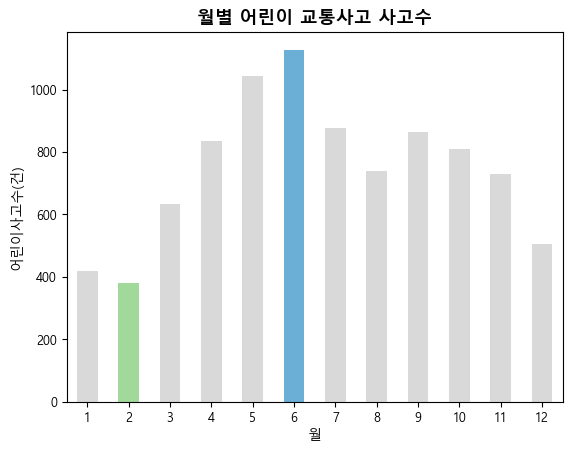

In [4]:
cmap1 = plt.get_cmap('tab20c')
df1.groupby('월').size().plot.bar(color=cmap1(np.array([19,10,19,19,19,1,19,19,19,19,19,19])),xlabel='', fontsize=9)
plt.xticks(rotation=0)
plt.title('월별 어린이 교통사고 사고수', loc='center', fontdict=fontdict)
plt.xlabel('월')
plt.ylabel('어린이사고수(건)')

Text(0, 0.5, '어린이사고수(건)')

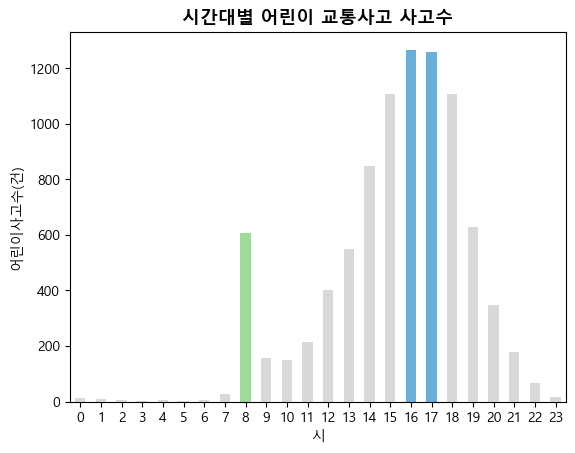

In [6]:
cmap1 = plt.get_cmap('tab20c')
df1.groupby('시간').size().plot.bar(color=cmap1(np.array([19,19,19,19,19,19,19,19,10,19,19,19,19,19,19,
                                                        19,1,1,19,19,19,19,19,19,19])),xlabel='')
plt.xticks(rotation=0)
title_font = {'fontsize': 14, 'color': 'black', 'fontweight':'bold'}
plt.title('시간대별 어린이 교통사고 사고수', loc='center', fontdict=fontdict)
plt.xlabel('시')
plt.ylabel('어린이사고수(건)')

Text(0, 0.5, '어린이사고수(건)')

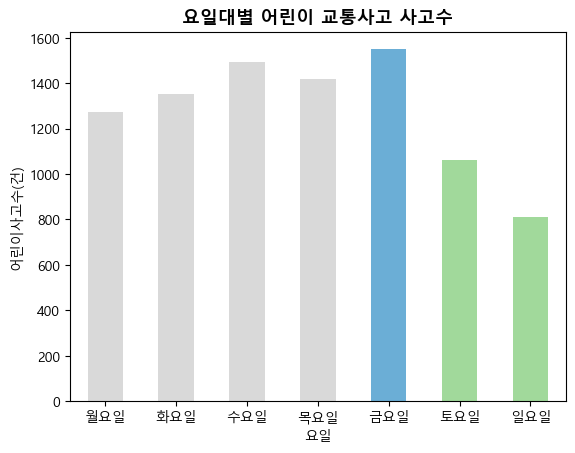

In [9]:
weekday_order = ['월요일', '화요일', '수요일', '목요일', '금요일', '토요일', '일요일']
df1['요일'] = pd.Categorical(df1['요일'], categories=weekday_order, ordered=True)
df1_sorted_weekday = df1.sort_values('요일') 
weekday_counts = df1_sorted_weekday['요일'].value_counts().sort_index()

cmap1 = plt.get_cmap('tab20c')
weekday_counts.plot.bar(color=cmap1(np.array([19,19,19,19,1,10,10])),xlabel='')
plt.xticks(rotation=0)
plt.title('요일대별 어린이 교통사고 사고수', loc='center', fontdict=fontdict)
plt.xlabel('요일')
plt.ylabel('어린이사고수(건)')

## 법규위반사항

In [ ]:
df1.법규위반.unique()

law = df1.법규위반.value_counts()

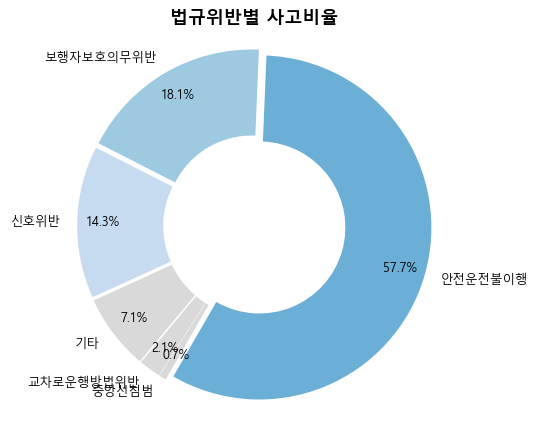

In [ ]:
cmap1 = plt.get_cmap('tab20c')
color1 = cmap1(np.array([1,2,3,19,19,19]))

plt.rc('font', family='Malgun Gothic')
plt.figure(figsize=(6,5))
explode=[0.03,0.03,0.03,0.03,0.03,0.03]
law[:6].plot.pie(wedgeprops={'width':0.5},autopct='%.1f%%',pctdistance=0.85,startangle=240,colors=color1,labeldistance=1.1,explode=explode,ylabel='',fontsize=9)
plt.axis('equal')
plt.title('법규위반별 사고비율',fontdict=fontdict)
plt.show()

---

## 가해운전자 연령 분석

In [ ]:
# 10대,20대,30대... 식으로 연령그래프 그리기
attack_age=df1['가해운전자 연령'].tolist()

for idx, x in enumerate(attack_age):

    if 1 < x <= 9:
        attack_age[idx] = '10대 미만'
    elif 10 <= x <= 19:
        attack_age[idx] = '10대'
    elif 20 <= x <= 29:
        attack_age[idx] = '20대'
    elif 30 <= x <= 39:
        attack_age[idx] = '30대'
    elif 40 <= x <= 49:
        attack_age[idx] = '40대'
    elif 50 <= x <= 59:
        attack_age[idx] = '50대'
    elif 60 <= x <= 69:
        attack_age[idx] = '60대'
    elif 70 <= x <= 99:
        attack_age[idx] = '70대 이상'
    else:
        attack_age[idx] = '미분류'
        
attack_age=pd.Series(attack_age)

In [ ]:
attack_age2=df1.groupby('가해운전자 연령').size()

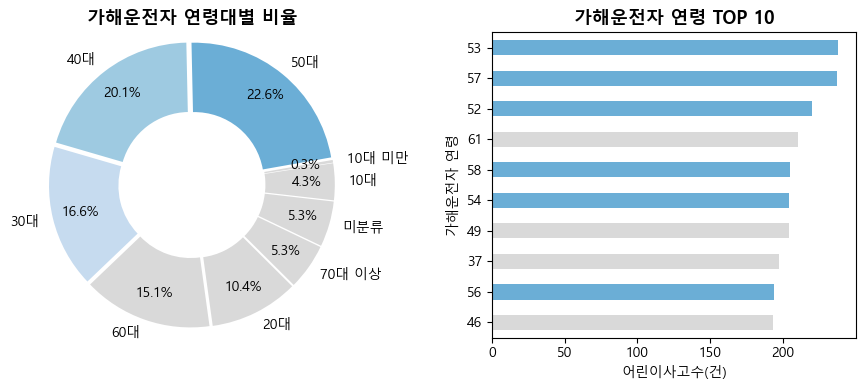

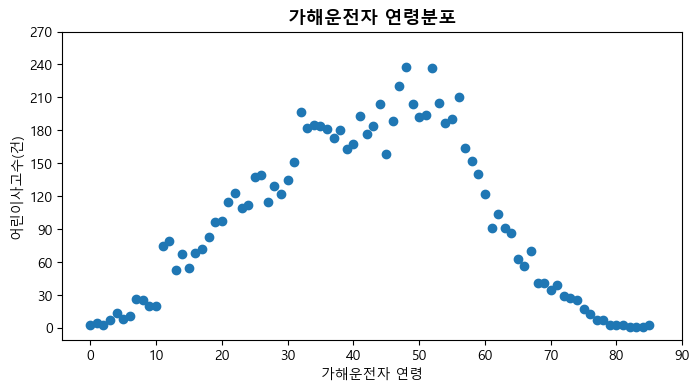

In [ ]:
# 그래프 그리기
plt.figure(figsize=(9,4))

plt.subplot(1,2,1)
cmap1 = plt.get_cmap('tab20c')
color1 = cmap1(np.array([1,2,3,19,19,19,19,19,19,19]))
explode2=[0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03]
attack_age.value_counts().plot.pie(wedgeprops={'width':0.5},autopct='%.1f%%', pctdistance=0.8, ylabel='',startangle=10,colors=color1,explode=explode2)
plt.axis('equal')
plt.title('가해운전자 연령대별 비율',fontdict=fontdict)

plt.subplot(1,2,2)
df1['가해운전자 연령'].value_counts()[1:11].sort_values(ascending=True).plot.barh(color=cmap1(np.array([19,1,19,19,1,1,19,1,1,1])))
plt.xticks(ticks=range(0,250,50))
plt.title('가해운전자 연령 TOP 10',fontdict=fontdict)
plt.xlabel('어린이사고수(건)')

plt.tight_layout()
plt.show()


plt.figure(figsize=(8,4))
plt.scatter(y=attack_age2[1:],x=[i for i in range(len(attack_age2)-1)])
plt.xticks(ticks=range(0,100,10))
plt.yticks(ticks=range(0,300,30))
plt.xlabel('가해운전자 연령')
plt.ylabel('어린이사고수(건)')
plt.title('가해운전자 연령분포',fontdict=fontdict)
plt.show()

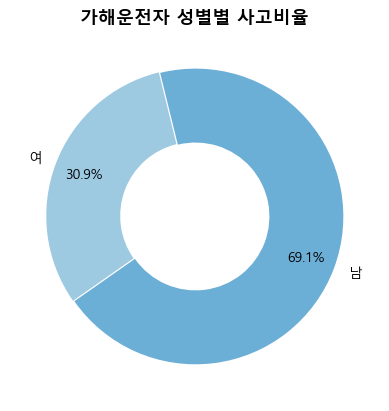

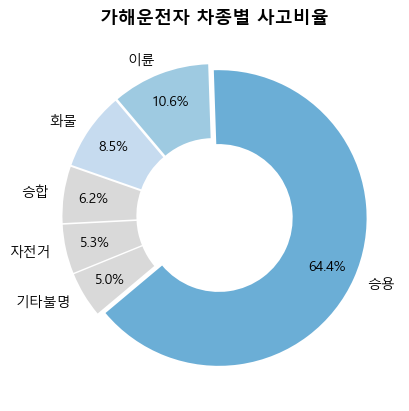

In [ ]:
# 가해자 성별,차종별 그래프 그리기
cmap1 = plt.get_cmap('tab20c')
color1 = cmap1(np.array([1,2,3,19,19,19,19,19,19,19]))
explode1=[0.03,0.03,0.03,0.03,0.03,0.03]
explode2=[0.005,0.005]

df1['가해운전자 성별'].value_counts()[:2].plot.pie(wedgeprops={'width':0.5},autopct='%.1f%%',pctdistance=0.8,ylabel='',startangle=215,colors=color1, explode=explode2)
plt.title('가해운전자 성별별 사고비율',fontdict=fontdict)
plt.show()

df1['가해운전자 차종'].value_counts()[:6].plot.pie(wedgeprops={'width':0.5},autopct='%.1f%%',pctdistance=0.8,ylabel='', startangle=220,colors=color1,explode=explode1)
plt.title('가해운전자 차종별 사고비율',fontdict=fontdict)
plt.show()

---

## 피해자 사고유형 그래프

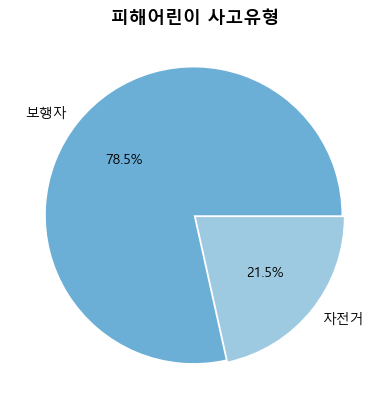

In [ ]:
df1['피해운전자 차종'].value_counts()[:2].plot.pie(autopct='%.1f%%',colors=color1,explode=[0.01,0.01])
plt.title('피해어린이 사고유형',fontdict=fontdict)
plt.xticks(rotation=15)
plt.xlabel('')
plt.ylabel('')
plt.show()

C:\Users\danddi\AppData\Local\Temp\ipykernel_2616\4164592051.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  condi_df.사고유형=condi_df.사고유형.str.replace('차대사람 - ','')
C:\Users\danddi\AppData\Local\Temp\ipykernel_2616\4164592051.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  condi_df1.사고유형=condi_df1.사고유형.str.replace('차대차 - ','')


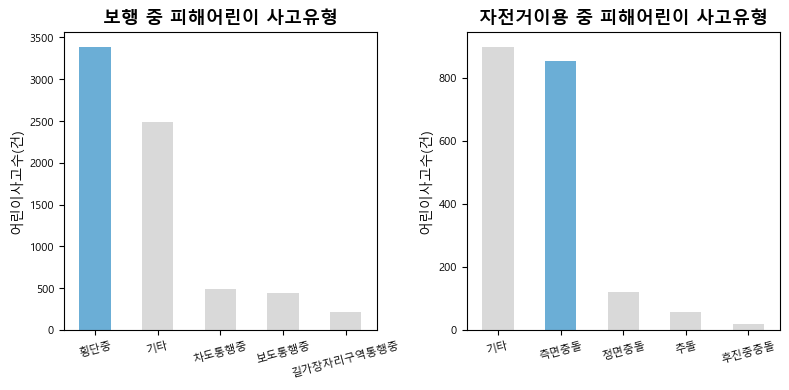

In [ ]:
plt.figure(figsize=(8,4))
color_condi=cmap1(np.array([1,19,19,19,19,19,19]))
color_condi1=cmap1(np.array([19,1,19,19,19,19,19]))

plt.subplot(1,2,1)
condi_df =df1[df1.사고유형.str.contains('차대사람')]
condi_df.사고유형=condi_df.사고유형.str.replace('차대사람 - ','')
condi_df.사고유형.value_counts().plot.bar(color=color_condi,fontsize=8)
plt.title('보행 중 피해어린이 사고유형',fontdict=fontdict)
plt.xticks(rotation=15)
plt.xlabel('')
plt.ylabel('어린이사고수(건)')
plt.show()

plt.subplot(1,2,2)
condi_df1 =df1[df1.사고유형.str.contains('차대차')]
condi_df1.사고유형=condi_df1.사고유형.str.replace('차대차 - ','')
condi_df1.사고유형.value_counts().plot.bar(color=color_condi1, fontsize=8)
plt.title('자전거이용 중 피해어린이 사고유형',fontdict=fontdict)
plt.xticks(rotation=15)
plt.xlabel('')
plt.ylabel('어린이사고수(건)')
plt.tight_layout()
plt.show()

---

## 피해자 도로유형별 사고 그래프

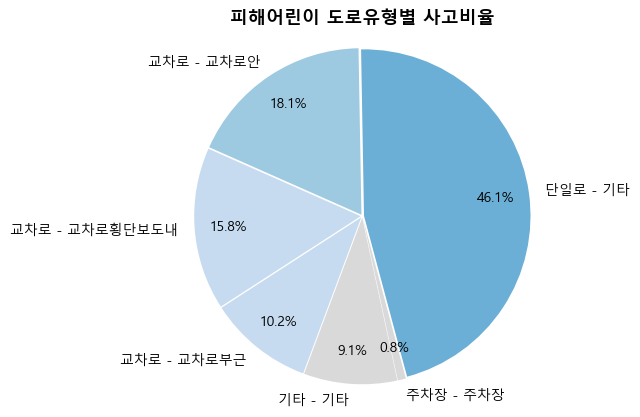

In [ ]:
# 전체 상해정도(부상신고~ 사망)
color_hurt=cmap1(np.array([1,2,3,3,19,19,19]))
injury_df = df1[~df1['피해운전자 상해정도'].str.contains('상해없음')]
injury_df.도로형태.value_counts()[:6].plot.pie(autopct='%.1f%%',pctdistance=0.8,ylabel='', startangle=285,colors=color_hurt,explode=[0.01,0.01,0.01,0.01,0.01,0.01])
plt.title('피해어린이 도로유형별 사고비율',fontdict=fontdict)
plt.axis('equal')
plt.show()

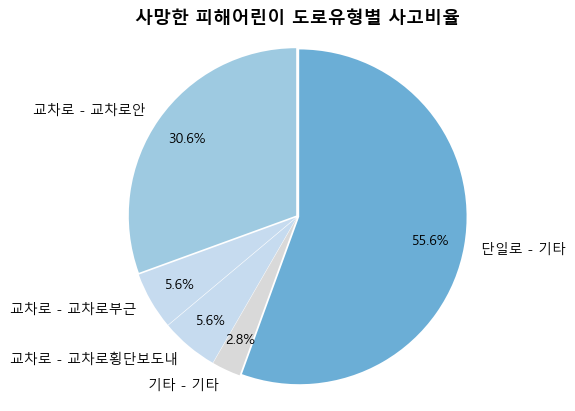

In [ ]:
# 상해정도 사망만.
color_hurt=cmap1(np.array([1,2,3,3,19,19,19]))
death_df = df1[df1['피해운전자 상해정도']=='사망']
death_df.도로형태.value_counts().plot.pie(autopct='%.1f%%',pctdistance=0.8,ylabel='',startangle=250, colors=color_hurt,explode=[0.01,0.01,0.01,0.01,0.01])
plt.title('사망한 피해어린이 도로유형별 사고비율',fontdict=fontdict)
plt.axis('equal')
plt.show()

---

## 피해어린이 성별, 연령별 사고수

Text(0, 0.5, '어린이사고수(건)')

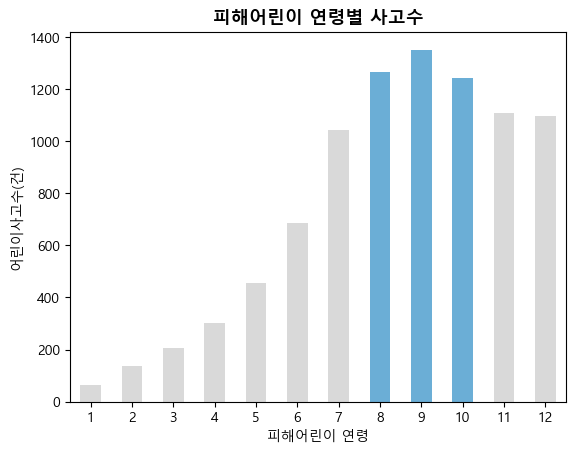

In [ ]:
cmap1 = plt.get_cmap('tab20c')
df1.groupby('피해운전자 연령').size().plot.bar(color=cmap1(np.array([19,19,19,19,19,19,19,1,1,1,19,19])),xlabel='')
plt.xticks(rotation=0)
plt.title('피해어린이 연령별 사고수',fontdict=fontdict)
plt.xlabel('피해어린이 연령')
plt.ylabel('어린이사고수(건)')

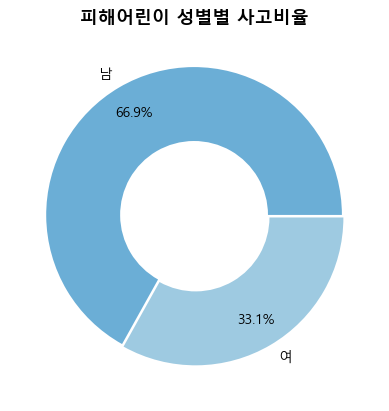

In [ ]:
df1.groupby('피해운전자 성별').size().plot.pie(wedgeprops={'width':0.5},autopct='%.1f%%',pctdistance=0.8,colors=cmap1(np.array([1,2])),xlabel='',explode=[0.01,0.01])
plt.title('피해어린이 성별별 사고비율',fontdict=fontdict)
plt.show()

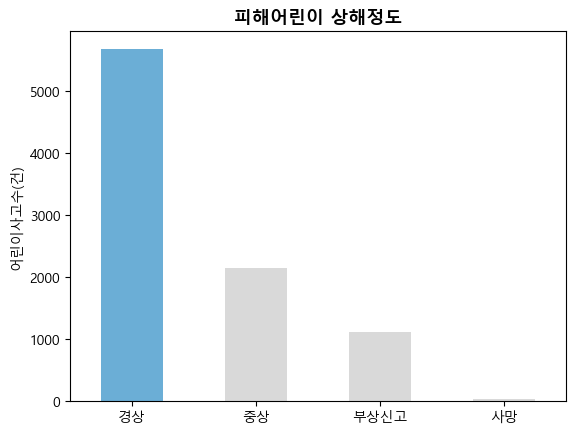

In [ ]:
color_hu=cmap1(np.array([1,19,19,19]))
df1['피해운전자 상해정도'].value_counts()[:4].plot.bar(color=color_hu)
plt.title('피해어린이 상해정도',fontdict=fontdict)
plt.ylabel('어린이사고수(건)')
plt.xlabel('')
plt.xticks(rotation=0)
plt.show()

---

## 경기 어린이인구수파일 전처리

In [ ]:
popul = pd.read_excel(r'c:/Users/danddi/my_ws/project/mid_project/경기2022어린이인구수.xlsx')
popul.head()

,행정기관코드,행정기관,총 인구수,연령구간인구수,0세,1세,2세,3세,4세,5세,6세,7세,8세,9세,10세,11세,12세
0,4100000000,경기도,"13,589,432","1,454,488","74,114","79,007","82,889","91,427","98,890","107,169","121,360","130,212","128,532","127,354","141,467","136,623","135,444"
1,4111000000,경기도 경기도 수원시,"1,190,964","121,318","6,528","6,759","7,021","7,605","8,149","8,762","9,960","10,915","10,542","10,538","11,844","11,327","11,368"
2,4111100000,경기도 경기도 수원시 장안구,"270,524","23,341","1,034","1,091","1,229","1,346","1,416","1,569","1,864","2,108","2,110","2,209","2,417","2,477","2,471"
3,4111300000,경기도 경기도 수원시 권선구,"367,446","38,480","2,090","2,194","2,277","2,428","2,658","2,866","3,276","3,484","3,381","3,325","3,745","3,414","3,342"
4,4111500000,경기도 경기도 수원시 팔달구,"192,610","15,341",995,"1,026","1,062","1,135","1,233","1,246","1,261","1,250","1,158","1,124","1,337","1,235","1,279"


In [ ]:
popul.shape

(49, 17)

In [ ]:
popul.columns

Index(['행정기관코드', '행정기관', '총 인구수', '연령구간인구수', '0세', '1세', '2세', '3세', '4세',
       '5세', '6세', '7세', '8세', '9세', '10세', '11세', '12세'],
      dtype='object')

In [ ]:
# 필요한 열만 추출
popul=popul[['행정기관', '총 인구수', '연령구간인구수']]
count=popul.행정기관.str.split().tolist()

# '행정기관'열에서 구를 제외한 시에 해당하는 행만 가져오기
index=[]
for idx,i in enumerate(count):
    if len(i)==3:
        index.append(idx)


popul.행정기관=popul.행정기관.str.replace('경기도','')
popul.행정기관=popul.행정기관.str.strip()
popul=popul.iloc[index,:]
popul.rename(columns={'행정기관':'시/구'},inplace=True)
popul.set_index('시/구',inplace=True)



## 경기도 시별, 보호구역 내/외 어린이교통사고 수 비교

In [ ]:
gyeng = pd.read_excel(r'c:/Users/danddi/my_ws/project/mid_project/어린이 교통사고 자료/어린이교통사고전처리완료/gyeonggi.xlsx',index_col='Unnamed: 0')
# 어린이 보호구역 내외로 사건수 카운트해서 다시 합치기
d_c = gyeng[gyeng.어린이보호구역==0]
d_c_g = d_c.groupby('시/구')['어린이보호구역'].count()
d_c1 = gyeng[gyeng.어린이보호구역==1]
d_c_g1 = d_c1.groupby('시/구')['어린이보호구역'].count()

a=pd.DataFrame(d_c_g)
b=pd.DataFrame(d_c_g1)
c=a.merge(b,left_index=True,right_index=True, how='outer')
c.fillna(0,inplace=True)

In [ ]:
# 시별 어린이 보호구역 내,외 사건수의 평균값 구하기
outmean=c.어린이보호구역_x.mean()
inmean=c.어린이보호구역_y.mean()
c.sort_values('어린이보호구역_x',ascending=False,inplace=True)

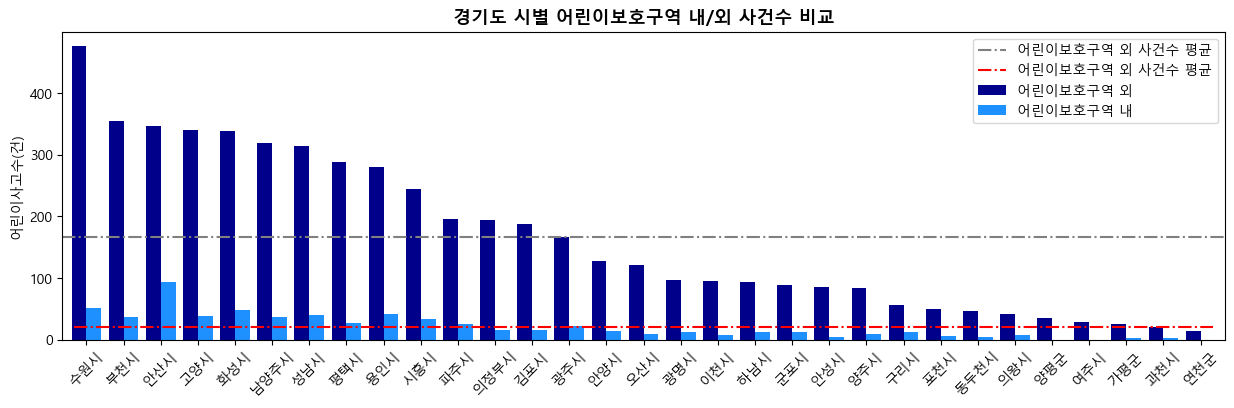

In [ ]:
# 그래프 작성
c.plot.bar(figsize=(15,4),width=0.8,color=['darkblue','dodgerblue'])
plt.axhline(y=outmean,color='gray', linestyle='-.',label='평균1')
plt.axhline(y=inmean,xmin=0.01,xmax=0.99, color='red',linestyle='-.',label='평균2')
plt.legend(['어린이보호구역 외 사건수 평균','어린이보호구역 외 사건수 평균','어린이보호구역 외', '어린이보호구역 내'])
plt.title('경기도 시별 어린이보호구역 내/외 사건수 비교',fontdict=fontdict)
plt.xticks(rotation=45)
plt.xlabel('')
plt.ylabel('어린이사고수(건)')
plt.show()

### 시별 어린이 인구수를 반영한 그래프

In [ ]:
# 어린이보호구역 내/외 사건수가 담긴 df와 시별 총인구수와 어린이인구수가 담긴 df합치기
d=c.merge(popul,left_index=True,right_index=True,how='outer')

# 어린이 인구수를 반영하기 위해 파생열 생성 
d['연령구간인구수']=d['연령구간인구수'].str.replace(',','').astype(int)
d['외/어린이수']=(d['어린이보호구역_x']/d['연령구간인구수'])*16000
d['내/어린이수']=(d['어린이보호구역_y']/d['연령구간인구수'])*16000

# 그래프 그리기위해 새로운 df에 지정
e=d[['외/어린이수','내/어린이수']]
e.sort_values('외/어린이수',ascending=False,inplace=True)

# 평균값
outmean_e = e['외/어린이수'].mean()
inmean_e = e['내/어린이수'].mean()

C:\Users\danddi\AppData\Local\Temp\ipykernel_2616\1037398695.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  e.sort_values('외/어린이수',ascending=False,inplace=True)


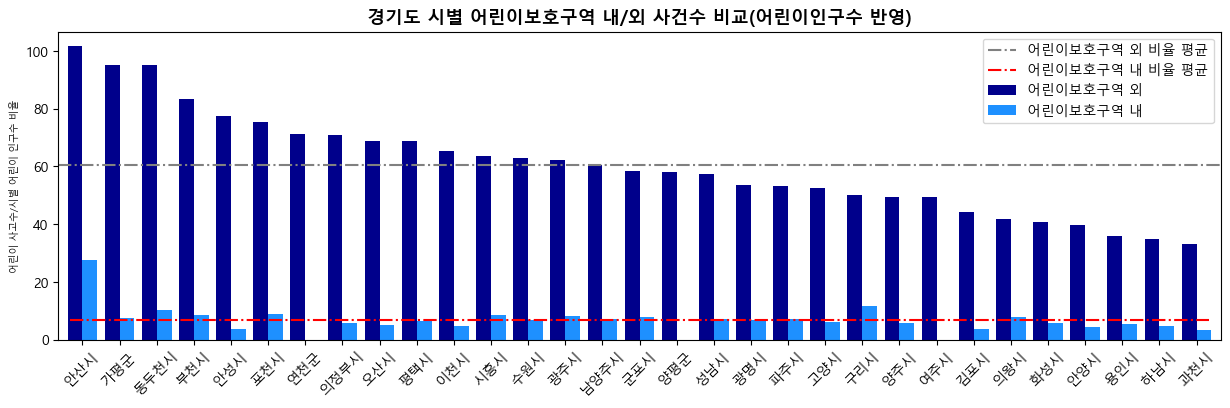

In [ ]:
e.plot.bar(figsize=(15,4),width=0.8,color=['darkblue','dodgerblue'])
plt.axhline(y=outmean_e,color='gray',linestyle='-.')
plt.axhline(y=inmean_e,xmin=0.01,xmax=0.99,color='red',linestyle='-.')
plt.legend(['어린이보호구역 외 비율 평균','어린이보호구역 내 비율 평균','어린이보호구역 외', '어린이보호구역 내'])
plt.title('경기도 시별 어린이보호구역 내/외 사건수 비교(어린이인구수 반영)',fontdict=fontdict)
plt.xticks(rotation=45)
plt.xlabel('')
plt.ylabel('어린이 사고수/시별 어린이 인구수 비율', fontsize=7)
plt.show()

---

## 서울 구별 어린이보호구역 내외 그래프

In [ ]:
# 서울 어린이 인구수 파일 전처리
seo_popul = pd.read_csv(r'c:/Users/danddi/my_ws/project/mid_project/서울2022어린이인구수.csv',encoding='cp949')
seo_popul=seo_popul[['행정구역', '2022년_계_총인구수', '2022년_계_연령구간인구수']]
seo_popul=seo_popul[1:]
seo_count=seo_popul.행정구역.str.split().tolist()
seo_count
seo_popul.행정구역
seo_popul.행정구역=seo_popul.행정구역.str.replace('서울특별시','')
seo_popul.행정구역=seo_popul.행정구역.str[:-12]
seo_popul.행정구역=seo_popul.행정구역.str.strip()
seo_popul.rename(columns={'행정구역':'구','2022년_계_총인구수':'총 인구수', '2022년_계_연령구간인구수':'어린이인구수'},inplace=True)
seo_popul.set_index('구',inplace=True)
seo_popul['어린이인구수']=seo_popul['어린이인구수'].str.replace(',','').astype(int)
seo_popul['총 인구수']=seo_popul['총 인구수'].str.replace(',','').astype(int)

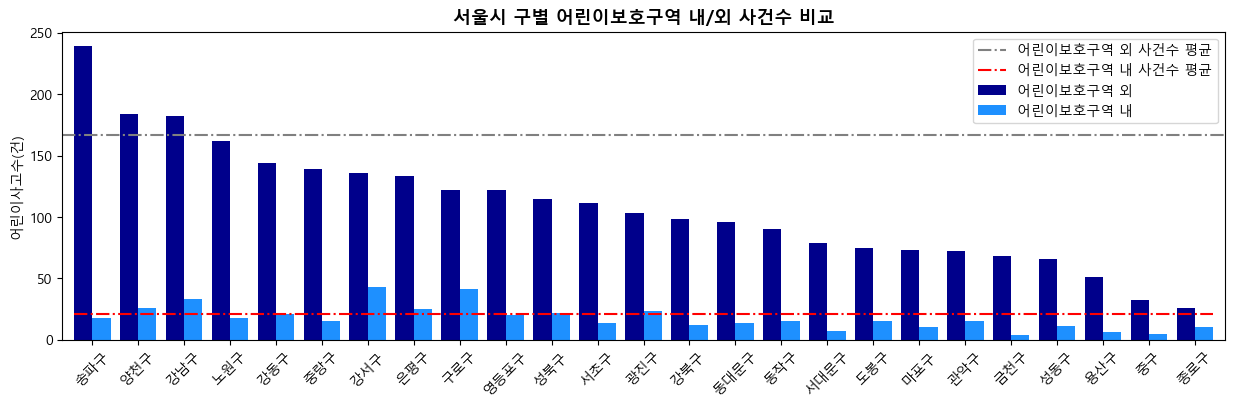

In [ ]:
seoul = pd.read_excel(r'c:/Users/danddi/my_ws/project/mid_project/어린이 교통사고 자료/어린이교통사고전처리완료/seoul.xlsx',index_col='Unnamed: 0')

seo = seoul[seoul.어린이보호구역==0]
seo_out = seo.groupby('시/구')['어린이보호구역'].count()
seo1 = seoul[seoul.어린이보호구역==1]
seo_in = seo1.groupby('시/구')['어린이보호구역'].count()

x=pd.DataFrame(seo_out)
y=pd.DataFrame(seo_in)

z=x.merge(y,left_index=True,right_index=True, how='outer')
z.fillna(0,inplace=True)
# df3.merge(df4, left_index=True,right_index=True)

outmean_seo=z.어린이보호구역_x.mean()
inmean_seo=z.어린이보호구역_y.mean()

z.sort_values('어린이보호구역_x',ascending=False,inplace=True)

z.plot.bar(figsize=(15,4),width=0.8, color=['darkblue','dodgerblue'])
plt.axhline(y=outmean,color='gray',linestyle='-.')
plt.axhline(y=inmean,xmin=0.01,xmax=0.99,color='red',linestyle='-.')
plt.xticks(rotation=45)
plt.legend(['어린이보호구역 외 사건수 평균','어린이보호구역 내 사건수 평균','어린이보호구역 외', '어린이보호구역 내'])
plt.title('서울시 구별 어린이보호구역 내/외 사건수 비교',fontdict=fontdict)
plt.xlabel('')
plt.ylabel('어린이사고수(건)')
plt.show()



C:\Users\danddi\AppData\Local\Temp\ipykernel_28016\2963933053.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  v.sort_values('외/어린이수',ascending=False,inplace=True)


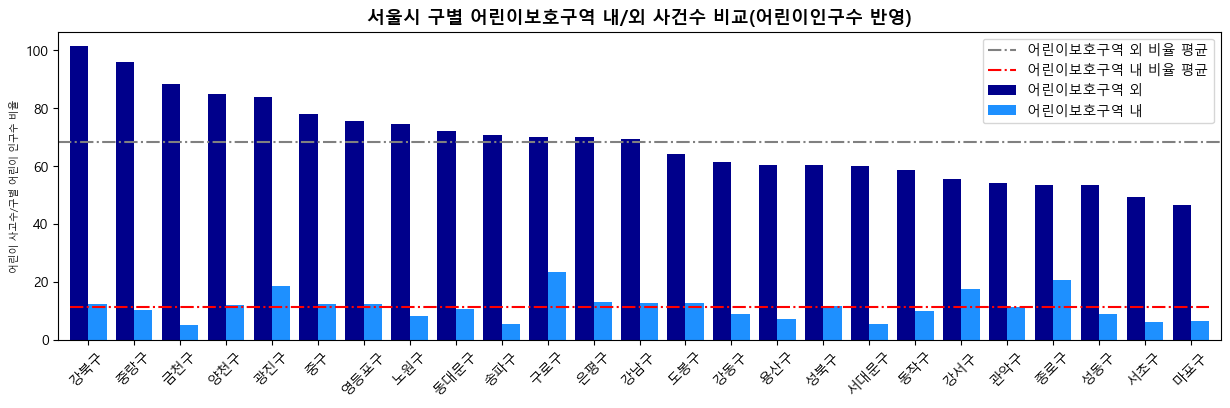

In [ ]:
u=z.merge(seo_popul,left_index=True,right_index=True,how='outer')
u['외/어린이수']=(u['어린이보호구역_x']/u['어린이인구수'])*19000
u['내/어린이수']=(u['어린이보호구역_y']/u['어린이인구수'])*19000

v=u[['외/어린이수','내/어린이수']]
v.sort_values('외/어린이수',ascending=False,inplace=True)
outmean_v = v['외/어린이수'].mean()
inmean_v = v['내/어린이수'].mean()
v.plot.bar(figsize=(15,4),width=0.8, color=['darkblue','dodgerblue'])
plt.xticks(rotation=45)
plt.axhline(y=outmean_v,color='gray',linestyle='-.')
plt.axhline(y=inmean_v,xmin=0.01,xmax=0.99,color='red',linestyle='-.')
plt.legend(['어린이보호구역 외 비율 평균','어린이보호구역 내 비율 평균','어린이보호구역 외', '어린이보호구역 내'])
plt.title('서울시 구별 어린이보호구역 내/외 사건수 비교(어린이인구수 반영)',fontdict=fontdict)
plt.ylabel('어린이 사고수/구별 어린이 인구수 비율', fontsize=7)
plt.show()

---

# 3. 어린이보호구역 지정 전/후 사고수 비교 데이터 전처리, 시각화 코드

In [ ]:
import pandas as pd
df1 = pd.read_excel(r'c:/Users/danddi/my_ws/project/mid_project/어린이 교통사고 자료/전국어린이보호구역표준데이터.xlsx')
df1.head()

,시설종류,대상시설명,소재지도로명주소,소재지지번주소,위도,경도,관리기관명,관할경찰서명,CCTV설치여부,CCTV설치대수,보호구역도로폭,데이터기준일자,제공기관코드,제공기관명,Unnamed: 14
0,초등학교,송산초등학교,전라남도 순천시 별량면 송산구기길 13,NaN,34.850138,127.416253,전라남도 순천시청,순천경찰서,Y,2.0,5,2023-08-14,4820000,전라남도 순천시,전남 순천시 별량면 송기리 298
1,초등학교,송광초등학교,전라남도 순천시 송광면 쌍향수길 1169,NaN,34.961262,127.266975,전라남도 순천시청,순천경찰서,Y,2.0,6,2023-08-14,4820000,전라남도 순천시,전남 순천시 송광면 이읍리 751
2,초등학교,주암초등학교,전라남도 순천시 주암면 동주로 2093,NaN,35.076823,127.239650,전라남도 순천시청,순천경찰서,Y,2.0,8,2023-08-14,4820000,전라남도 순천시,전남 순천시 주암면 구산리 721
3,초등학교,좌야초등학교,전라남도 순천시 해룡면 좌야로 77-9,NaN,34.930485,127.544900,전라남도 순천시청,순천경찰서,Y,4.0,16,2023-08-14,4820000,전라남도 순천시,전남 순천시 해룡면 신대리 2104
4,초등학교,매안초등학교,전라남도 순천시 해룡면 좌야로 16,NaN,34.930865,127.552441,전라남도 순천시청,순천경찰서,Y,4.0,17,2023-08-14,4820000,전라남도 순천시,전남 순천시 해룡면 신대리 2018


In [ ]:
df1 = df1[df1.제공기관명.str.contains(r'(경기도|서울특별시)')]
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4634 entries, 64 to 15248
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   시설종류         4634 non-null   object        
 1   대상시설명        4634 non-null   object        
 2   소재지도로명주소     4492 non-null   object        
 3   소재지지번주소      4073 non-null   object        
 4   위도           4634 non-null   float64       
 5   경도           4634 non-null   float64       
 6   관리기관명        4634 non-null   object        
 7   관할경찰서명       4634 non-null   object        
 8   CCTV설치여부     4634 non-null   object        
 9   CCTV설치대수     3761 non-null   float64       
 10  보호구역도로폭      3491 non-null   object        
 11  데이터기준일자      4634 non-null   datetime64[ns]
 12  제공기관코드       4634 non-null   int64         
 13  제공기관명        4634 non-null   object        
 14  Unnamed: 14  4427 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(10)
mem

C:\Users\danddi\AppData\Local\Temp\ipykernel_29480\3277343054.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df1 = df1[df1.제공기관명.str.contains(r'(경기도|서울특별시)')]


In [ ]:
df21=df1[['시설종류', '대상시설명','위도', '경도', '보호구역도로폭']]

In [ ]:
# taas 사고반경분석에서 요구하는 좌표계로 변환

import geopandas as gpd

geo_df = gpd.GeoDataFrame(df21, geometry=gpd.points_from_xy(df21['경도'], df21['위도']))
geo_df.set_crs(epsg = 4326, inplace = True)
geo_df = geo_df.to_crs({'init':'epsg:5181'})
geo_df

c:\Users\danddi\miniconda3\envs\test_venv\lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


,시설종류,대상시설명,위도,경도,보호구역도로폭,geometry
64,유치원,세화유치원,37.514999,126.871238,6,POINT (188616.438 446176.610)
65,유치원,신목유치원,37.546331,126.870203,6,POINT (188529.735 449654.202)
66,어린이집,다솜어린이집,37.545105,126.882074,6,POINT (189578.615 449516.748)
67,어린이집,청솔어린이집,37.540751,126.864345,6,POINT (188011.165 449035.620)
68,어린이집,파란들어린이집,37.535612,126.825367,17,POINT (184565.330 448470.937)
...,...,...,...,...,...,...
15244,초등학교,장월초등학교,37.621941,127.047165,NaN,POINT (204163.786 458039.200)
15245,초등학교,숭인초등학교,37.609161,127.038235,NaN,POINT (203376.001 456620.400)
15246,유치원,덕수유치원,37.594003,126.995299,10,POINT (199584.798 454937.365)
15247,유치원,동덕유치원,37.606205,127.044004,NaN,POINT (203885.600 456292.507)


---

In [ ]:
# 2020년 보호구역으로 지정된 시설 중 다양하게 선정하려고 함.
import pandas as pd

df3 = pd.read_excel(r'c:/Users/danddi/my_ws/project/mid_project/어린이 교통사고 자료/서울어린이보호구역지정현황/어린이보호구역 지정현황(202106월말 기준).xlsx',index_col='1. 어린이보호구역 ')
df3.columns=('자치단체','자치구명','동명(도로명 주소)','시설명','시설종류','지정일자','drop')
df3.drop('drop',axis=1, inplace=True)
df3.dropna(axis=0, inplace=True)
df3[3:]
df3.head()

,자치단체,자치구명,동명(도로명 주소),시설명,시설종류,지정일자
1. 어린이보호구역,,,,,,
,소계,종로구,48,,,
1,서울,종로구,경운동,교동,초등학교,2006
2,서울,종로구,무악동,독립문,초등학교,2005
3,서울,종로구,필운동,매동,초등학교,2005
4,서울,종로구,창신3동,명신,초등학교,1995


In [ ]:
df3.shape

(1742, 6)

In [ ]:
twotwo_df=df3[df3.지정일자==2020]

In [ ]:
twotwo_df.시설종류.unique()

array(['어린이집', '초등학교', '외국인학교', '특수학교', '학원', '유치원', '독서실', '병설유치원'],
      dtype=object)

In [ ]:
# 아래부터는 시설 선정을 위한 조회. epsg:5181좌표로 변환한 df에 있는 시설로 선정.
twotwo_df[twotwo_df.시설종류=='유치원']

,자치단체,자치구명,동명(도로명 주소),시설명,시설종류,지정일자
1. 어린이보호구역,,,,,,
59,서울,은평구,녹번동,자연,유치원,2020
60,서울,은평구,응암3동,서문,유치원,2020
49,서울,강동구,길동,그리새,유치원,2020


In [ ]:
twotwo_df.head()

,자치단체,자치구명,동명(도로명 주소),시설명,시설종류,지정일자
1. 어린이보호구역,,,,,,
26,서울,중구,신당동,햇살,어린이집,2020
21,서울,성동구,사근동,한양,초등학교,2020
72,서울,광진구,광장로 1,재한몽골학교,외국인학교,2020
73,서울,광진구,강변역로 18,광진학교(구남초교 중복),특수학교,2020
74,서울,광진구,천호대로120길 32,능동꿈맞이어린이집,어린이집,2020


In [ ]:
twotwo_df.tail()

,자치단체,자치구명,동명(도로명 주소),시설명,시설종류,지정일자
1. 어린이보호구역,,,,,,
81,서울,송파구,가락동 131-12,은송,어린이집,2020
28,서울,강동구,상일동,고현,초등학교,2020
49,서울,강동구,길동,그리새,유치원,2020
50,서울,강동구,상일동,한영병설,병설유치원,2020
83,서울,강동구,천호동,구립다온,어린이집,2020


In [ ]:
twotwo_df[twotwo_df['자치구명']=='강남구']

,자치단체,자치구명,동명(도로명 주소),시설명,시설종류,지정일자
1. 어린이보호구역,,,,,,
99,서울,강남구,개포동,예지,어린이집,2020
100,서울,강남구,대치동,보람,어린이집,2020
101,서울,강남구,대치동,강남최강학원,학원,2020
102,서울,강남구,대치동,새움학원,학원,2020
103,서울,강남구,대치동,시대인재15학원,학원,2020
104,서울,강남구,대치동,시대인재2관학원,학원,2020
105,서울,강남구,대치동,시대인재98학원,학원,2020
106,서울,강남구,대치동,시대인재99학원,학원,2020
107,서울,강남구,대치동,시대인재학원,학원,2020


In [ ]:
twotwo_df[twotwo_df['자치구명']=='강서구']

,자치단체,자치구명,동명(도로명 주소),시설명,시설종류,지정일자
1. 어린이보호구역,,,,,,
82,서울,강서구,강서로17다길 15-14,구립새하늘어린이집,어린이집,2020
83,서울,강서구,곰달래로53가길6,꿈을여는어린이집,어린이집,2020
84,서울,강서구,초록마을로40,눈높이런닝센터,학원,2020
85,서울,강서구,개화동로23길 111,성산어린이집,어린이집,2020
86,서울,강서구,마곡중앙8로1길 10,구립엠밸리큰나무어린이집,어린이집,2020
87,서울,강서구,강서로45다길 102,하늘숲어린이집,어린이집,2020
88,서울,강서구,곰달래로49길 80,스터디플랜독서실,독서실,2020


In [ ]:
twotwo_df[twotwo_df['자치구명']=='양천구']

,자치단체,자치구명,동명(도로명 주소),시설명,시설종류,지정일자
1. 어린이보호구역,,,,,,
93,서울,양천구,신월7동,이화,어린이집,2020
96,서울,양천구,신월1동,리틀플래닛(명칭변경),학원,2020


In [ ]:
geo_df[geo_df['대상시설명']=='서문유치원']

,시설종류,대상시설명,위도,경도,보호구역도로폭,geometry
1337,유치원,서문유치원,37.59226,126.91665,5.5,POINT (192638.816 454747.134)


In [ ]:
geo_df[geo_df['대상시설명']=='능동꿈맞이어린이집']

,시설종류,대상시설명,위도,경도,보호구역도로폭,geometry
4022,어린이집,능동꿈맞이어린이집,37.55283,127.085914,NaN,POINT (207591.620 450371.081)


In [ ]:
geo_df[geo_df['대상시설명']=='하늘숲어린이집']

,시설종류,대상시설명,위도,경도,보호구역도로폭,geometry
5891,어린이집,하늘숲어린이집,37.341628,127.068856,N,POINT (206101.480 426929.310)
12412,어린이집,하늘숲어린이집,37.543369,126.834408,4,POINT (185365.939 449330.390)


In [ ]:
geo_df[geo_df['대상시설명']=='고현초등학교']

,시설종류,대상시설명,위도,경도,보호구역도로폭,geometry
12402,초등학교,고현초등학교,37.553801,127.166031,15,POINT (214670.786 450488.310)


In [ ]:
geo_df[geo_df['대상시설명']=='한양초등학교']

,시설종류,대상시설명,위도,경도,보호구역도로폭,geometry
7276,초등학교,한양초등학교,37.557621,127.050263,20,POINT (204441.150 450900.530)


In [ ]:
geo_df[geo_df['대상시설명'].str.contains('학원')]

,시설종류,대상시설명,위도,경도,보호구역도로폭,geometry
88,학원,리틀플래닛학원,37.530901,126.835853,6,POINT (185491.172 447946.404)
1000,학원,아발론랭콘중계어학원,37.650830,127.077815,12~20,POINT (206866.936 461247.340)
1001,학원,알로곤영재센터학원,37.650830,127.077815,12~20,POINT (206866.936 461247.340)
1002,학원,올림피아드영재센터학원,37.650830,127.077815,12~20,POINT (206866.936 461247.340)
1003,학원,조재필 수학학원,37.650830,127.077815,12~20,POINT (206866.936 461247.340)
1004,학원,중계덕스어학원,37.650830,127.077815,12~20,POINT (206866.936 461247.340)
1005,학원,중계미래탐구초등연재센터학원,37.650830,127.077815,12~20,POINT (206866.936 461247.340)
1006,학원,중계세일입시학원,37.650830,127.077815,12~20,POINT (206866.936 461247.340)
1007,학원,청담어학원,37.650830,127.077815,12~20,POINT (206866.936 461247.340)
1008,학원,최선어학원,37.650830,127.077815,12~20,POINT (206866.936 461247.340)


In [ ]:
geo_df[geo_df['대상시설명'].str.contains('리틀플래닛')]

,시설종류,대상시설명,위도,경도,보호구역도로폭,geometry
88,학원,리틀플래닛학원,37.530901,126.835853,6,POINT (185491.172 447946.404)


In [ ]:
geo_df[geo_df['대상시설명'].str.contains('논술')]

,시설종류,대상시설명,위도,경도,보호구역도로폭,geometry
1016,학원,씨앤에이논술보습학원,37.652197,127.072435,8,POINT (206392.119 461398.736)


In [ ]:
geo_df[geo_df['대상시설명'].str.contains('미술')]

,시설종류,대상시설명,위도,경도,보호구역도로폭,geometry
1013,학원,크레용미술학원,37.652197,127.072435,8,POINT (206392.119 461398.736)
7743,유치원,자연과미술유치원,37.054554,127.066698,NaN,POINT (205932.657 395069.339)
8171,학원,미래연미술학원,37.480221,126.971485,6~7,POINT (197477.884 442309.296)


In [ ]:
twotwo_df[twotwo_df['시설종류'].str.contains('어린이집')]

,자치단체,자치구명,동명(도로명 주소),시설명,시설종류,지정일자
1. 어린이보호구역,,,,,,
26,서울,중구,신당동,햇살,어린이집,2020
74,서울,광진구,천호대로120길 32,능동꿈맞이어린이집,어린이집,2020
69,서울,동대문구,약령시로3길 38,언덕위하얀,어린이집,2020
70,서울,동대문구,답십리로60길 40,대람늘푸른,어린이집,2020
71,서울,동대문구,장안벗꽃로107 현대홈타운(아),장안현대,어린이집,2020
99,서울,성북구,길음동,길음빛,어린이집,2020
100,서울,성북구,장위동,장위,어린이집,2020
101,서울,성북구,석관동,하은,어린이집,2020
74,서울,은평구,불광1동,보듬손,어린이집,2020


In [ ]:
geo_df[geo_df['대상시설명'].str.contains('은송')]

,시설종류,대상시설명,위도,경도,보호구역도로폭,geometry
7201,어린이집,은송어린이집,37.493802,127.126301,7~9,POINT (211169.112 443823.697)


In [ ]:
twotwo_df[twotwo_df['시설명'].str.contains('어학원')]

,자치단체,자치구명,동명(도로명 주소),시설명,시설종류,지정일자
1. 어린이보호구역,,,,,,
107,서울,노원구,중계동,중계덕스어학원,학원,2020
108,서울,노원구,중계동,아발론랭콘중계어학원,학원,2020
111,서울,노원구,중계동,청담어학원,학원,2020
112,서울,노원구,중계동,중계스텔라어학원,학원,2020
116,서울,강남구,대치동,파르테논어학원,학원,2020


In [ ]:
geo_df[geo_df['대상시설명'].str.contains('학원')]

,시설종류,대상시설명,위도,경도,보호구역도로폭,geometry
88,학원,리틀플래닛학원,37.530901,126.835853,6,POINT (185491.172 447946.404)
1000,학원,아발론랭콘중계어학원,37.650830,127.077815,12~20,POINT (206866.936 461247.340)
1001,학원,알로곤영재센터학원,37.650830,127.077815,12~20,POINT (206866.936 461247.340)
1002,학원,올림피아드영재센터학원,37.650830,127.077815,12~20,POINT (206866.936 461247.340)
1003,학원,조재필 수학학원,37.650830,127.077815,12~20,POINT (206866.936 461247.340)
1004,학원,중계덕스어학원,37.650830,127.077815,12~20,POINT (206866.936 461247.340)
1005,학원,중계미래탐구초등연재센터학원,37.650830,127.077815,12~20,POINT (206866.936 461247.340)
1006,학원,중계세일입시학원,37.650830,127.077815,12~20,POINT (206866.936 461247.340)
1007,학원,청담어학원,37.650830,127.077815,12~20,POINT (206866.936 461247.340)
1008,학원,최선어학원,37.650830,127.077815,12~20,POINT (206866.936 461247.340)


In [ ]:
twotwo_df[twotwo_df['시설명'].str.contains('학원')]

,자치단체,자치구명,동명(도로명 주소),시설명,시설종류,지정일자
1. 어린이보호구역,,,,,,
106,서울,노원구,중계동,중계미래탐구초등연재센터학원,학원,2020
107,서울,노원구,중계동,중계덕스어학원,학원,2020
108,서울,노원구,중계동,아발론랭콘중계어학원,학원,2020
109,서울,노원구,중계동,하이레벨수학전문학원,학원,2020
110,서울,노원구,중계동,소마사고력수학학원,학원,2020
111,서울,노원구,중계동,청담어학원,학원,2020
112,서울,노원구,중계동,중계스텔라어학원,학원,2020
113,서울,노원구,중계동,국풍2000학원,학원,2020
114,서울,노원구,중계동,올림피아드영재센터학원,학원,2020


In [ ]:
geo_df[geo_df['대상시설명'].str.contains('보습학원')]

,시설종류,대상시설명,위도,경도,보호구역도로폭,geometry
1016,학원,씨앤에이논술보습학원,37.652197,127.072435,8,POINT (206392.119 461398.736)
10150,학원,청맥보습학원,37.475457,126.917884,6~10,POINT (192736.450 441783.340)
10151,학원,꿈이크는 보습학원,37.474375,126.920328,6~8,POINT (192952.590 441663.050)
10152,학원,강남예일 보습학원,37.473919,126.918569,6~8,POINT (192796.920 441612.580)
10153,학원,오름 보습학원,37.473485,126.918126,28,POINT (192757.660 441564.510)


In [ ]:
twotwo_df['시설종류'].value_counts()

시설종류
학원       44
어린이집     21
유치원       3
초등학교      2
외국인학교     1
특수학교      1
독서실       1
병설유치원     1
Name: count, dtype: int64

In [ ]:
# 위의 과정을 거쳐 9개의 시설을 선정( 각기 다른 구에 위치한 초등학교 2개, 유치원 1개, 어린이집 2개, 학원4개 )

---

In [ ]:
# 보호구역 지정 전(2018~19년), 지정 후(2021~22년)의 사건데이터 불러옴
acc_before=pd.read_excel(r'c:/Users/danddi/my_ws/project/mid_project/어린이 교통사고 자료/지정전.xlsx')
acc_after=pd.read_excel(r'c:/Users/danddi/my_ws/project/mid_project/어린이 교통사고 자료/지정후.xlsx')

In [ ]:
acc_before_df = pd.DataFrame(acc_before.groupby('장소').size())
acc_before_df.rename(columns={0:'지정 전'},inplace=True)
acc_before_df

,지정 전
장소,
꿈이크는 보습학원,4
능동꿈맞이어린이집,3
리틀플래닛학원,2
서문유치원,4
올림피아드영재센터학원,7
은송어린이집,2


In [ ]:
acc_after_df = pd.DataFrame(acc_after.groupby('장소').size())
acc_after_df.rename(columns={0:'지정 후'},inplace=True)
acc_after_df

,지정 후
장소,
고현초등학교,1
꿈이크는 보습학원,4
능동꿈맞이어린이집,2
리틀플래닛학원,1
미래연미술학원,1
서문유치원,4
올림피아드영재센터학원,6
은송어린이집,2


In [ ]:
acc_df =acc_after_df.merge(acc_before_df,how='outer',left_index=True, right_index=True)
acc_df.fillna(0,inplace=True)
acc_df=acc_df[['지정 전','지정 후']]
acc_df

,지정 전,지정 후
장소,,
고현초등학교,0.0,1
꿈이크는 보습학원,4.0,4
능동꿈맞이어린이집,3.0,2
리틀플래닛학원,2.0,1
미래연미술학원,0.0,1
서문유치원,4.0,4
올림피아드영재센터학원,7.0,6
은송어린이집,2.0,2


In [ ]:
acc_df.index

Index(['고현초등학교', '꿈이크는 보습학원', '능동꿈맞이어린이집', '리틀플래닛학원', '미래연미술학원', '서문유치원',
       '올림피아드영재센터학원', '은송어린이집'],
      dtype='object', name='장소')

In [ ]:
# 전후 사건발생이 0건인 행이 누락되어 추가함.
acc_df.loc['한양초등학교'] =[0,0]
acc_df

,지정 전,지정 후
장소,,
고현초등학교,0.0,1
꿈이크는 보습학원,4.0,4
능동꿈맞이어린이집,3.0,2
리틀플래닛학원,2.0,1
미래연미술학원,0.0,1
서문유치원,4.0,4
올림피아드영재센터학원,7.0,6
은송어린이집,2.0,2
한양초등학교,0.0,0


In [ ]:
# 특징을 잘 알 수 있게 인덱스 변경 
acc_df.set_index(keys=[['강동구 초등학교','관악구 학원','광진구 어린이집','양천구 학원','동작구 학원','은평구 유치원','노원구 학원','송파구 어린이집','성동구 초등학교']], inplace=True, drop=True)
acc_df

,지정 전,지정 후
강동구 초등학교,0.0,1
관악구 학원,4.0,4
광진구 어린이집,3.0,2
양천구 학원,2.0,1
동작구 학원,0.0,1
은평구 유치원,4.0,4
노원구 학원,7.0,6
송파구 어린이집,2.0,2
성동구 초등학교,0.0,0


In [ ]:
acc_df.sort_values('지정 전',ascending=False,inplace=True)

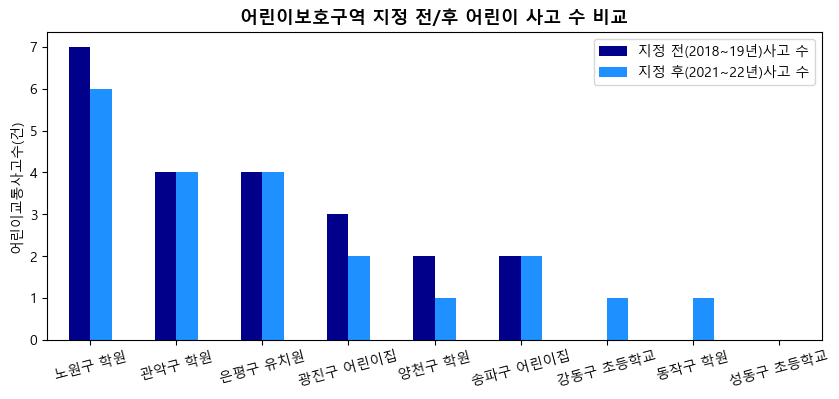

In [ ]:
import matplotlib.pyplot as plt

plt.rc('font', family='Malgun Gothic')
fontdict={'fontsize':'13','fontweight':'bold'}

plt.rcParams['axes.unicode_minus']=False
acc_df.plot.bar(figsize=(10,4),color=['darkblue','dodgerblue'],xlabel='시설명',ylabel='어린이교통사고수(건)')
plt.title('어린이보호구역 지정 전/후 어린이 사고 수 비교',fontdict=fontdict)
plt.xticks(rotation=15)
plt.xlabel('')
plt.legend(['지정 전(2018~19년)사고 수','지정 후(2021~22년)사고 수'])
plt.show()


---